In [1]:
# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# call expression data
exp = pd.read_csv("Breast_GSE45827.csv")

# call annotation file
gpl = pd.read_csv("GPL570-55999.txt", sep='\t', comment='#', low_memory=False)

In [2]:
exp.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
gpl.head()

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


## Pre-process

In [6]:
exp.value_counts('type')

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64

In [7]:
exp2 = exp.set_index('samples')

# Create separate X and X_scaled to compare performance before and after scaling predictors
X = exp2.drop(columns={'type'},axis=1)
y = exp2['type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42,stratify=y)

# Dimmensionality Reduction

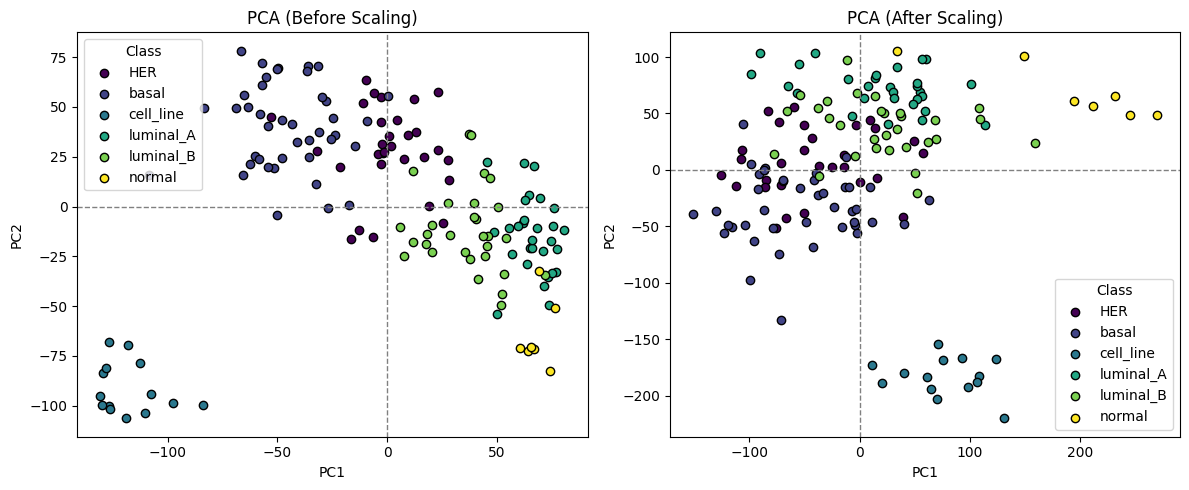

In [8]:
# Perform PCA separately for original and scaled data
X_pca = PCA(n_components=2).fit_transform(X)
X_scaled_pca = PCA(n_components=2).fit_transform(X_scaled)

# Get unique class labels and assign colors
unique_classes = np.unique(y)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))
class_to_color = {cls: color for cls, color in zip(unique_classes, colors)}

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- PCA (Before Scaling) ---
for cls in unique_classes:
    idx = (y == cls)
    axes[0].scatter(X_pca[idx, 0], X_pca[idx, 1],
                    color=class_to_color[cls], label=cls, edgecolor='k')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('PCA (Before Scaling)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(title='Class')

# --- PCA (After Scaling) ---
for cls in unique_classes:
    idx = (y == cls)
    axes[1].scatter(X_scaled_pca[idx, 0], X_scaled_pca[idx, 1],
                    color=class_to_color[cls], label=cls, edgecolor='k')
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('PCA (After Scaling)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend(title='Class')

plt.tight_layout()
plt.show()

In [9]:
# Define the random forest model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate best model on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report on Test Set:
               precision    recall  f1-score   support

         HER       0.86      1.00      0.92         6
       basal       1.00      0.88      0.93         8
   cell_line       1.00      1.00      1.00         3
   luminal_A       0.83      0.83      0.83         6
   luminal_B       0.86      1.00      0.92         6
      normal       1.00      0.50      0.67         2

    accuracy                           0.90        31
   macro avg       0.92      0.87      0.88        31
weighted avg       0.91      0.90      0.90        31



In [10]:
# Scaled
rf_scaled = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_scaled, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_scaled_train, y_train)

# Evaluate best model on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_scaled_test)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report on Test Set:
               precision    recall  f1-score   support

         HER       0.86      1.00      0.92         6
       basal       1.00      0.88      0.93         8
   cell_line       1.00      1.00      1.00         3
   luminal_A       0.83      0.83      0.83         6
   luminal_B       0.86      1.00      0.92         6
      normal       1.00      0.50      0.67         2

    accuracy                           0.90        31
   macro avg       0.92      0.87      0.88        31
weighted avg       0.91      0.90      0.90        31



In [11]:
# Get feature importances
importances = best_rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Subset to top 20 features
top_n = 20
top_features = importance_df.head(top_n)

print(f"\nTop {top_n} Feature Importances:\n", top_features)


Top 20 Feature Importances:
                        Feature  Importance
19457              210052_s_at    0.002384
14561              205114_s_at    0.001991
54483                 52940_at    0.001769
37527                228273_at    0.001747
34167              224909_s_at    0.001617
17729                208305_at    0.001409
15075                205628_at    0.001391
29295                220011_at    0.001386
23539                214240_at    0.001366
30112              220828_s_at    0.001358
42359                233106_at    0.001354
19095                209687_at    0.001345
10259                200811_at    0.001309
338                 1552733_at    0.001271
38864                229610_at    0.001250
36618              227363_s_at    0.001242
9844                1570439_at    0.001220
54637  AFFX-HUMRGE/M10098_5_at    0.001210
32658                223381_at    0.001193
20762              211432_s_at    0.001191


In [12]:
# Rename the Feature column to 'ID'
importance_df = importance_df.rename(columns={"Feature": "ID"})

# Ensure 'ID' column in importance_df is string
importance_df["ID"] = importance_df["ID"].astype(str)

# Load the annotation file
gpl = pd.read_csv("GPL570-55999.txt", sep='\t', comment='#', low_memory=False)

# Subset columns we care about and ensure 'ID' is string
annotation = gpl[['ID', 'Gene Symbol','Gene Ontology Molecular Function']].dropna()
annotation["ID"] = annotation["ID"].astype(str)

# Merge using string-typed IDs
importance_df_anno = importance_df.merge(annotation, on='ID', how='left')

importance_df_anno = importance_df_anno.dropna(subset=['Gene Symbol'])

# Convert gene symbols to string (in case some are still floats)
importance_df_anno['Gene Symbol'] = importance_df_anno['Gene Symbol'].astype(str)

importance_df_anno['Gene Ontology Molecular Function'] = importance_df_anno['Gene Ontology Molecular Function'].astype(str).str[:60]

# Display result
importance_df_anno.head()

,ID,Importance,Gene Symbol,Gene Ontology Molecular Function
0,210052_s_at,0.002384,TPX2,0005515 // protein binding // inferred from ph...
1,205114_s_at,0.001991,CCL3 /// CCL3L1 /// CCL3L3,0004672 // protein kinase activity // inferred...
2,52940_at,0.001769,SIGIRR,0005515 // protein binding // inferred from ph...
4,224909_s_at,0.001617,PREX1,0005085 // guanyl-nucleotide exchange factor a...
5,208305_at,0.001409,PGR,0000978 // RNA polymerase II core promoter pro...


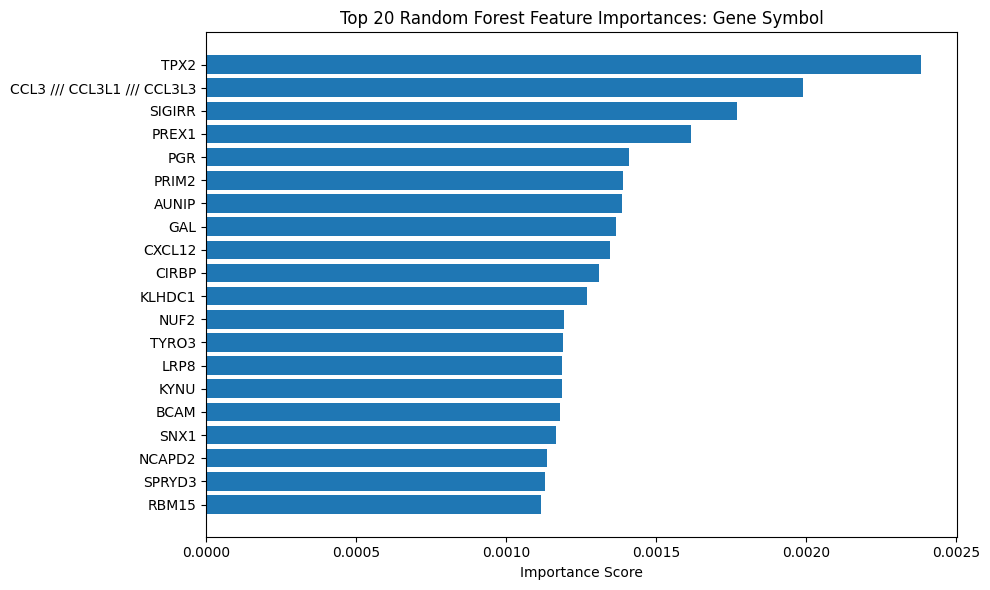

In [12]:
# Optional: limit to top N
top_n = 20
importance_df_anno = importance_df_anno.sort_values(by='Importance', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df_anno['Gene Symbol'], importance_df_anno['Importance'])
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Random Forest Feature Importances: Gene Symbol')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



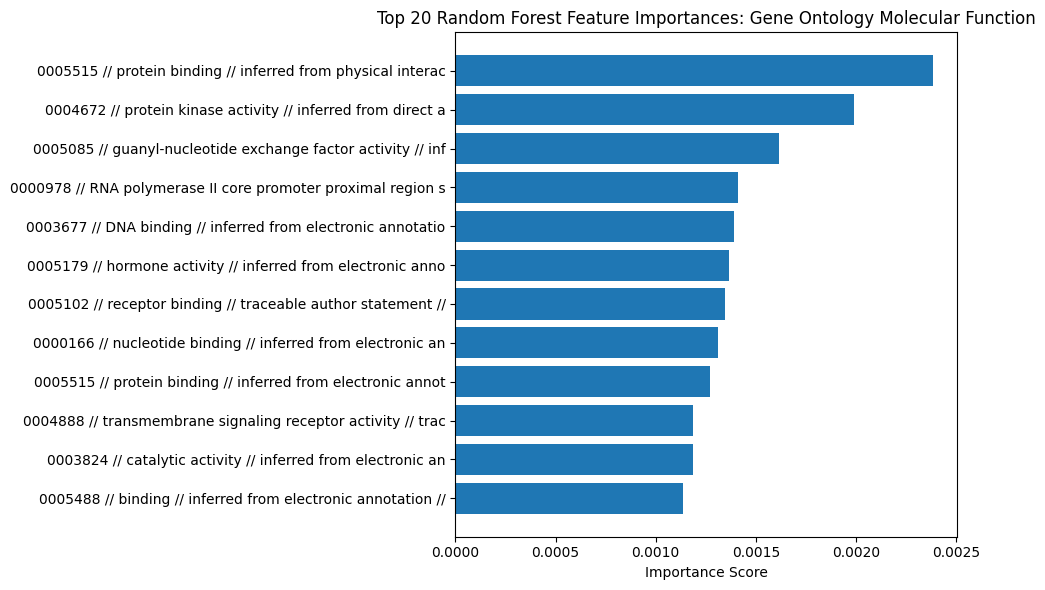

In [13]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df_anno['Gene Ontology Molecular Function'], importance_df_anno['Importance'])
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Random Forest Feature Importances: Gene Ontology Molecular Function')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Garrett want us to maybe explain what the highest feature importance genes mean? Like what the function of the genes are.